In [1]:
!pip install ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.6 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-2_jdiq8v
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-2_jdiq8v
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install torchvision --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Saudi-Heritage-GenAI

/content/drive/MyDrive/Saudi-Heritage-GenAI


In [6]:
import os
import clip
import torch
from PIL import Image
from tqdm import tqdm
import pandas as pd

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Paths
base_dir = "/content/drive/MyDrive/Saudi-Heritage-GenAI/clip-eval-dataset"
generated_dir = os.path.join(base_dir, "generated")
prompts_dir = os.path.join(base_dir, "prompts")
csv_path = os.path.join(base_dir, "clip_results.csv")

# Categories
categories = {
    "women": ["asiri", "hijazi", "najdi"],
    "men": ["asiri", "hijazi", "najdi"]
}

# Store results
results = []

for gender, styles in categories.items():
    print(f"\nEvaluating {gender.upper()}")
    for style in styles:
        print(f" Style: {style.capitalize()}")

        image_folder = os.path.join(generated_dir, gender, style)
        prompt_file = os.path.join(prompts_dir, gender, f"{style}.txt")

        with open(prompt_file, 'r', encoding='utf-8') as f:
            prompts = [line.strip() for line in f if line.strip()]

        image_files = sorted([
            f for f in os.listdir(image_folder)
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))
        ])

        if len(prompts) != len(image_files):
            print(f"Mismatch in {gender}/{style}: {len(image_files)} images vs {len(prompts)} prompts")

        total_score = 0
        valid_count = min(len(prompts), len(image_files))

        for i in tqdm(range(valid_count), desc=f"{gender}/{style}"):
            image_path = os.path.join(image_folder, image_files[i])
            prompt = prompts[i]

            try:
                image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
                text = clip.tokenize([prompt]).to(device)

                with torch.no_grad():
                    image_features = model.encode_image(image)
                    text_features = model.encode_text(text)
                    image_features /= image_features.norm(dim=-1, keepdim=True)
                    text_features /= text_features.norm(dim=-1, keepdim=True)
                    similarity = (image_features @ text_features.T).item()
                    total_score += similarity
            except Exception as e:
                print(f"Error in {image_path}: {e}")

        avg_score = total_score / valid_count if valid_count > 0 else 0
        results.append({"Gender": gender, "Style": style, "CLIP_Score": round(avg_score, 4)})

# Save to CSV
df = pd.DataFrame(results)
df.to_csv(csv_path, index=False)
print(f"\n CLIP results saved to: {csv_path}")

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 126MiB/s]



Evaluating WOMEN
 Style: Asiri


women/asiri: 100%|██████████| 80/80 [00:32<00:00,  2.43it/s]


 Style: Hijazi


women/hijazi: 100%|██████████| 83/83 [00:30<00:00,  2.74it/s]


 Style: Najdi


women/najdi: 100%|██████████| 80/80 [00:32<00:00,  2.44it/s]



Evaluating MEN
 Style: Asiri


men/asiri: 100%|██████████| 33/33 [00:13<00:00,  2.44it/s]


 Style: Hijazi


men/hijazi: 100%|██████████| 28/28 [00:11<00:00,  2.50it/s]


 Style: Najdi


men/najdi: 100%|██████████| 33/33 [00:12<00:00,  2.68it/s]


 CLIP results saved to: /content/drive/MyDrive/Saudi-Heritage-GenAI/clip-eval-dataset/clip_results.csv


In [ ]:
import os
import clip
import torch
from PIL import Image
from tqdm import tqdm
import pandas as pd

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Paths
base_dir = "/content/drive/MyDrive/Saudi-Heritage-GenAI/clip-eval-dataset"
generated_dir = os.path.join(base_dir, "generated")
prompts_dir = os.path.join(base_dir, "prompts")
csv_path = os.path.join(base_dir, "clip_results.csv")

# Categories
categories = {
    "women": ["asiri", "hijazi", "najdi"],
    "men": ["asiri", "hijazi", "najdi"]
}

# Store results
results = []

for gender, styles in categories.items():
    print(f"\nEvaluating {gender.upper()}")
    for style in styles:
        print(f" Style: {style.capitalize()}")

        image_folder = os.path.join(generated_dir, gender, style)
        prompt_file = os.path.join(prompts_dir, gender, f"{style}.txt")

        with open(prompt_file, 'r', encoding='utf-8') as f:
            prompts = [line.strip() for line in f if line.strip()]

        image_files = sorted([
            f for f in os.listdir(image_folder)
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))
        ])

        if len(prompts) != len(image_files):
            print(f"Mismatch in {gender}/{style}: {len(image_files)} images vs {len(prompts)} prompts")

        total_score = 0
        valid_count = min(len(prompts), len(image_files))

        for i in tqdm(range(valid_count), desc=f"{gender}/{style}"):
            image_path = os.path.join(image_folder, image_files[i])
            prompt = prompts[i]

            try:
                image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
                text = clip.tokenize([prompt]).to(device)

                with torch.no_grad():
                    image_features = model.encode_image(image)
                    text_features = model.encode_text(text)
                    image_features /= image_features.norm(dim=-1, keepdim=True)
                    text_features /= text_features.norm(dim=-1, keepdim=True)
                    similarity = (image_features @ text_features.T).item()
                    total_score += similarity
            except Exception as e:
                print(f"Error in {image_path}: {e}")

        avg_score = total_score / valid_count if valid_count > 0 else 0
        results.append({"Gender": gender, "Style": style, "CLIP_Score": round(avg_score, 4)})

# Print results before saving
print("\n=== CLIP Score Results ===")
for row in results:
    key = f"{row['Gender']}_{row['Style']}"
    print(f"{key}: {row['CLIP_Score']:.4f}")

# Save to CSV
df = pd.DataFrame(results)
df.to_csv(csv_path, index=False)
print(f"\n CLIP results saved to: {csv_path}")


Evaluating WOMEN
 Style: Asiri


women/asiri: 100%|██████████| 80/80 [00:02<00:00, 36.30it/s]


 Style: Hijazi


women/hijazi: 100%|██████████| 83/83 [00:02<00:00, 34.15it/s]


 Style: Najdi


women/najdi: 100%|██████████| 80/80 [00:02<00:00, 28.68it/s]



Evaluating MEN
 Style: Asiri


men/asiri: 100%|██████████| 33/33 [00:00<00:00, 37.77it/s]


 Style: Hijazi


men/hijazi: 100%|██████████| 28/28 [00:00<00:00, 37.03it/s]


 Style: Najdi


men/najdi: 100%|██████████| 33/33 [00:00<00:00, 37.06it/s]


=== CLIP Score Results ===
women_asiri: 0.2799
women_hijazi: 0.2811
women_najdi: 0.2877
men_asiri: 0.2914
men_hijazi: 0.3221
men_najdi: 0.2996

 CLIP results saved to: /content/drive/MyDrive/Saudi-Heritage-GenAI/clip-eval-dataset/clip_results.csv


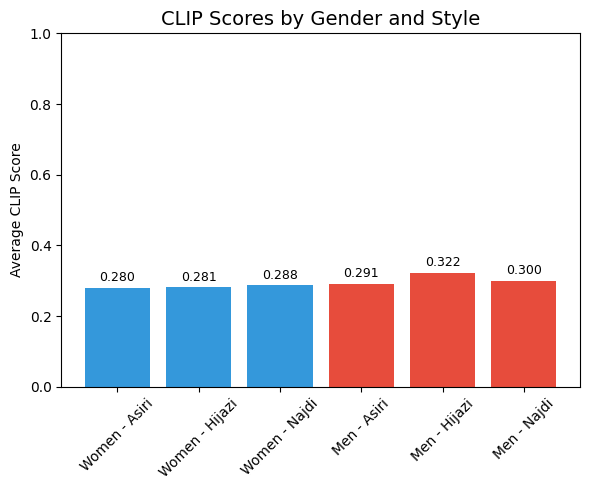


 CLIP bar plot saved to: clip-eval-dataset/clip_bar_plot.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load CSV
csv_path = "clip-eval-dataset/clip_results.csv"
df = pd.read_csv(csv_path)

# Add custom label
df["Label"] = df["Gender"].str.capitalize() + " - " + df["Style"].str.capitalize()

# Sort: Women first, then by style (or score optionally)
gender_order = {"women": 0, "men": 1}
df["GenderOrder"] = df["Gender"].map(gender_order)
df = df.sort_values(by=["GenderOrder", "Style"], ascending=[True, True])

# Color mapping (men = red, women = blue)
colors = ['#E74C3C' if g == 'men' else '#3498DB' for g in df['Gender']]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(df["Label"], df["CLIP_Score"], color=colors)
plt.title("CLIP Scores by Gender and Style", fontsize=14)
plt.ylabel("Average CLIP Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.0)

# Annotate bars with scores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center', va='bottom', fontsize=9)

# Save the plot
plot_path = os.path.join(os.path.dirname(csv_path), "clip_bar_plot.png")
plt.tight_layout()
plt.savefig(plot_path)
plt.show()

print(f"\n CLIP bar plot saved to: {plot_path}")